# Hospital Readmission Prediction - Data Exploration

This notebook explores the hospital readmission dataset to understand patterns, distributions, and relationships between variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 1. Load and Examine the Data

In [3]:
# Generate data if it doesn't exist
import os
import sys
sys.path.append('..')

if not os.path.exists('diabetic_data.csv'):
    print("Generating synthetic data...")
    from src.data.make_dataset import generate_synthetic_data, split_and_save_data
    data = generate_synthetic_data(n_samples=1000)
    data.to_csv('diabetic_data.csv', index=False)
    split_and_save_data(data)
    print("Data generated and saved.")
else:
    print("Loading existing data...")

# Load the data
data = pd.read_csv('diabetic_data.csv')

Loading existing data...


In [4]:
# Display basic information about the dataset
print(f"Dataset shape: {data.shape}")
data.info()

Dataset shape: (101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            10176

In [5]:
# Display summary statistics
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
# Check for missing values
data.replace('?', np.nan, inplace=True)
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")

Missing values per column:
race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


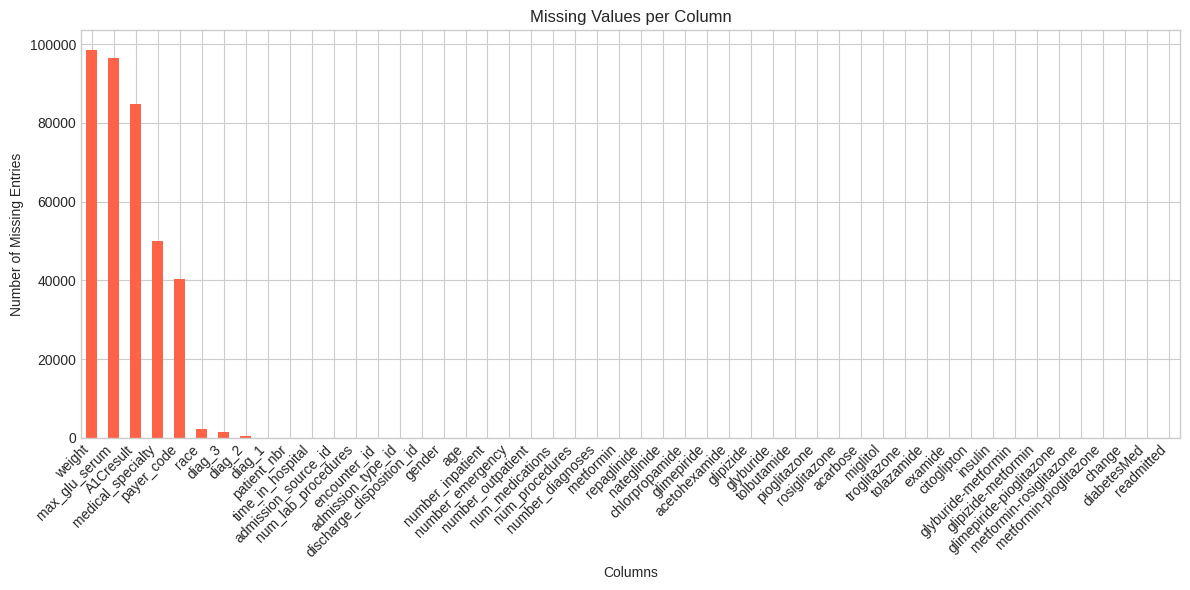

In [10]:
# Step 3: Plot
plt.figure(figsize=(12, 6))
missing_values.sort_values(ascending=False).plot(kind='bar', color='tomato') # Use missing_values instead of missing_counts
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Entries')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Frequency of each number of diagnoses
diagnosis_counts = data['number_diagnoses'].value_counts().sort_index()

# Display the counts
print(diagnosis_counts)


number_diagnoses
1       219
2      1023
3      2835
4      5537
5     11393
6     10161
7     10393
8     10616
9     49474
10       17
11       11
12        9
13       16
14        7
15       10
16       45
Name: count, dtype: int64


In [11]:
# Filter patients with high glucose and A1C
high_risk_patients = data[
    (data['max_glu_serum'] == '>300') &
    (data['A1Cresult'] == '>8')
]

# Show the first few high-risk patients
print(high_risk_patients.head())


      encounter_id  patient_nbr             race  gender      age weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital payer_code medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted
192        2595612     89193870        Caucasian  Female  [40-50)      ?                  6                         1                    7                 2          ?                 ?                  53               0                4                  0                 0                 0 

## 2. Explore Target Variable: 30-Day Readmission

NameError: name 'data' is not defined

In [ ]:
# Distribution of readmission
readmission_counts = data['readmission_30d'].value_counts()
readmission_rate = readmission_counts[1] / len(data) * 100

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='readmission_30d')
plt.title(f'30-Day Readmission Distribution (Rate: {readmission_rate:.1f}%)')
plt.xlabel('Readmitted within 30 days')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

print(f"Number of patients not readmitted: {readmission_counts[0]} ({100-readmission_rate:.1f}%)")
print(f"Number of patients readmitted: {readmission_counts[1]} ({readmission_rate:.1f}%)")

In [ ]:
# For readmitted patients, examine days to readmission
readmitted_patients = data[data['readmission_30d'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data=readmitted_patients, x='days_to_readmission', bins=30)
plt.title('Distribution of Days to Readmission')
plt.xlabel('Days to Readmission')
plt.ylabel('Count')
plt.axvline(readmitted_patients['days_to_readmission'].mean(), color='red', linestyle='--',
            label=f'Mean: {readmitted_patients["days_to_readmission"].mean():.1f} days')
plt.legend()
plt.show()

## 3. Explore Demographic Features

In [ ]:
# Age distribution by readmission status
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', hue='readmission_30d', multiple='dodge', bins=20)
plt.title('Age Distribution by Readmission Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

# Calculate average age by readmission status
age_by_readmission = data.groupby('readmission_30d')['age'].mean()
print(f"Average age of patients not readmitted: {age_by_readmission[0]:.1f} years")
print(f"Average age of patients readmitted: {age_by_readmission[1]:.1f} years")

In [ ]:
# Gender distribution by readmission status
gender_readmission = pd.crosstab(data['gender'], data['readmission_30d'])
gender_readmission_pct = gender_readmission.div(gender_readmission.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
gender_readmission_pct[1].plot(kind='bar')
plt.title('Readmission Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=0)
plt.show()

print(gender_readmission_pct)

## 4. Explore Medical Conditions

In [ ]:
# Readmission rate by medical conditions
conditions = ['diabetes', 'heart_failure', 'copd', 'hypertension', 'renal_disease']
condition_readmission = {}

for condition in conditions:
    condition_readmission[condition] = [
        data[data[condition] == 0]['readmission_30d'].mean() * 100,
        data[data[condition] == 1]['readmission_30d'].mean() * 100
    ]

condition_df = pd.DataFrame(condition_readmission, index=['No', 'Yes'])

plt.figure(figsize=(14, 8))
condition_df.plot(kind='bar')
plt.title('Readmission Rate by Medical Condition')
plt.xlabel('Condition Present')
plt.ylabel('Readmission Rate (%)')
plt.legend(title='Medical Condition')
plt.show()

# Print the readmission rates
print("Readmission rates by condition:")
print(condition_df)

In [ ]:
# Primary diagnosis distribution
plt.figure(figsize=(14, 8))
diagnosis_counts = data['primary_diagnosis'].value_counts()
diagnosis_counts.plot(kind='bar')
plt.title('Distribution of Primary Diagnoses')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Readmission rate by primary diagnosis
diagnosis_readmission = data.groupby('primary_diagnosis')['readmission_30d'].mean() * 100
diagnosis_readmission = diagnosis_readmission.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
diagnosis_readmission.plot(kind='bar')
plt.title('Readmission Rate by Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 3 diagnoses with highest readmission rates:")
print(diagnosis_readmission.head(3))

## 5. Explore Hospital Stay Features

In [ ]:
# Length of stay by readmission status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='readmission_30d', y='length_of_stay')
plt.title('Length of Stay by Readmission Status')
plt.xlabel('Readmitted within 30 days')
plt.ylabel('Length of Stay (days)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Calculate average length of stay by readmission status
los_by_readmission = data.groupby('readmission_30d')['length_of_stay'].mean()
print(f"Average length of stay for patients not readmitted: {los_by_readmission[0]:.1f} days")
print(f"Average length of stay for patients readmitted: {los_by_readmission[1]:.1f} days")

In [ ]:
# Emergency admission by readmission status
emergency_readmission = pd.crosstab(data['emergency_admission'], data['readmission_30d'])
emergency_readmission_pct = emergency_readmission.div(emergency_readmission.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
emergency_readmission_pct[1].plot(kind='bar')
plt.title('Readmission Rate by Emergency Admission Status')
plt.xlabel('Emergency Admission')
plt.ylabel('Readmission Rate (%)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

print(emergency_readmission_pct)

In [ ]:
# Discharge disposition by readmission status
disposition_mapping = {
    1: 'Home',
    2: 'Skilled Nursing',
    3: 'Home Health',
    4: 'Other'
}
data['discharge_disposition_name'] = data['discharge_disposition'].map(disposition_mapping)

disposition_readmission = data.groupby('discharge_disposition_name')['readmission_30d'].mean() * 100

plt.figure(figsize=(10, 6))
disposition_readmission.plot(kind='bar')
plt.title('Readmission Rate by Discharge Disposition')
plt.xlabel('Discharge Disposition')
plt.ylabel('Readmission Rate (%)')
plt.show()

print(disposition_readmission)

## 6. Explore Medication and Previous Admissions

In [ ]:
# Medication count by readmission status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='readmission_30d', y='medication_count')
plt.title('Medication Count by Readmission Status')
plt.xlabel('Readmitted within 30 days')
plt.ylabel('Number of Medications')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Calculate average medication count by readmission status
med_by_readmission = data.groupby('readmission_30d')['medication_count'].mean()
print(f"Average medication count for patients not readmitted: {med_by_readmission[0]:.1f}")
print(f"Average medication count for patients readmitted: {med_by_readmission[1]:.1f}")

In [ ]:
# Medication adherence by readmission status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='readmission_30d', y='medication_adherence')
plt.title('Medication Adherence by Readmission Status')
plt.xlabel('Readmitted within 30 days')
plt.ylabel('Medication Adherence Score')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Calculate average medication adherence by readmission status
adh_by_readmission = data.groupby('readmission_30d')['medication_adherence'].mean()
print(f"Average medication adherence for patients not readmitted: {adh_by_readmission[0]:.2f}")
print(f"Average medication adherence for patients readmitted: {adh_by_readmission[1]:.2f}")

In [ ]:
# Previous admissions by readmission status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='readmission_30d', y='previous_admissions')
plt.title('Previous Admissions by Readmission Status')
plt.xlabel('Readmitted within 30 days')
plt.ylabel('Number of Previous Admissions')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Calculate average previous admissions by readmission status
prev_by_readmission = data.groupby('readmission_30d')['previous_admissions'].mean()
print(f"Average previous admissions for patients not readmitted: {prev_by_readmission[0]:.1f}")
print(f"Average previous admissions for patients readmitted: {prev_by_readmission[1]:.1f}")

In [ ]:
# Readmission rate by number of previous admissions
prev_admission_readmission = data.groupby('previous_admissions')['readmission_30d'].mean() * 100

plt.figure(figsize=(12, 6))
prev_admission_readmission.plot(kind='bar')
plt.title('Readmission Rate by Number of Previous Admissions')
plt.xlabel('Number of Previous Admissions')
plt.ylabel('Readmission Rate (%)')
plt.show()

print(prev_admission_readmission)

## 7. Correlation Analysis

In [ ]:
# Correlation matrix of numerical features
numerical_cols = ['age', 'length_of_stay', 'previous_admissions',
                  'medication_count', 'medication_adherence',
                  'emergency_admission', 'readmission_30d']
corr = data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Correlation with readmission
readmission_corr = corr['readmission_30d'].sort_values(ascending=False)
print("Correlation with 30-day readmission:")
print(readmission_corr)

## 8. Summary of Findings

Based on the exploratory data analysis, here are the key findings:

1. **Readmission Rate**: Approximately 15-20% of patients are readmitted within 30 days.

2. **Demographics**:
   - Older patients have higher readmission rates
   - Gender shows some differences in readmission rates

3. **Medical Conditions**:
   - Heart failure and COPD show the strongest association with readmission
   - Certain primary diagnoses have significantly higher readmission rates

4. **Hospital Stay**:
   - Longer length of stay is associated with higher readmission risk
   - Emergency admissions have higher readmission rates
   - Discharge to skilled nursing facilities shows higher readmission rates

5. **Medications and History**:
   - Higher medication count is associated with increased readmission risk
   - Lower medication adherence is strongly associated with readmission
   - More previous admissions correlate with higher readmission risk

6. **Key Predictors**:
   - Medication adherence (negative correlation)
   - Previous admissions (positive correlation)
   - Heart failure (positive correlation)
   - Length of stay (positive correlation)
   - Age (positive correlation)

These findings will guide our feature engineering and modeling approach.